In [1]:
#%% Imports.
import numpy as np
import matplotlib
%matplotlib inline
#%matplotlib notebook
import ardent

/home/dtward/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#%% Load template and target.
# specify path
target_image_filename = '/home/dtward/Documents/cis/ardent-work/neuronex2/datasets/average_template_50.img'
atlas_image_filename = '/home/dtward/Documents/cis/ardent-work/neuronex2/datasets/PMD3097_orig_target_STS_clean.img'

# load
atlas = ardent.io.load(atlas_image_filename, down=[4,4,4], norm='sad', pad=1)
target = ardent.io.load(target_image_filename, down=[8,8,8], norm='sad', pad=1)

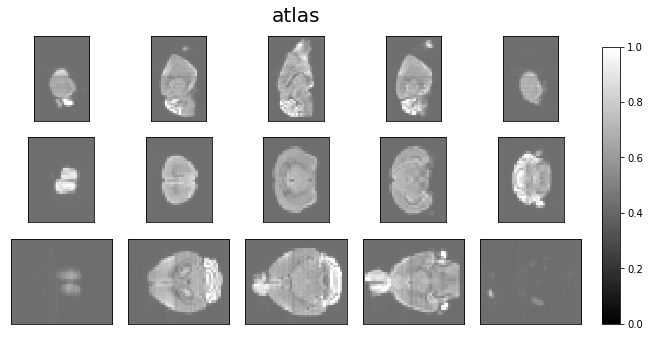

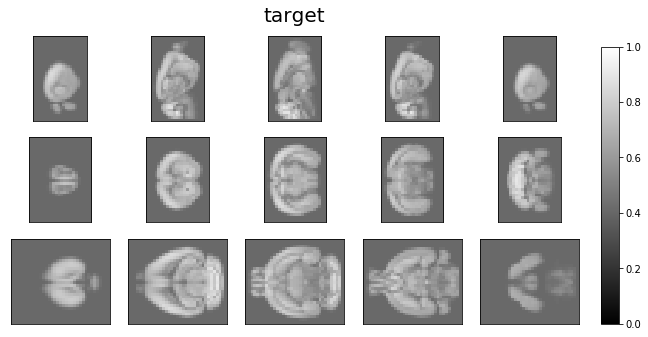

In [3]:
#%% Visualize images before registration, check orientation
ardent.heatslices(atlas, title='atlas', limit_mode='stdev')
ardent.heatslices(target, title='target', limit_mode='stdev')

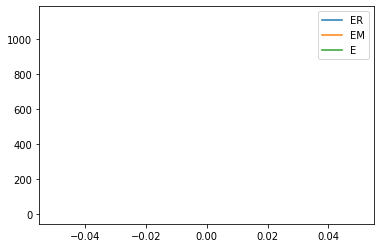

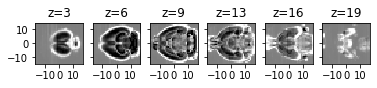

Completed iteration 0, E=1132.796634502389, EM=1132.796634502389, ER=0.0
Completed iteration 1, E=854.1614382337929, EM=853.4843896990275, ER=0.6770485347653701
Completed iteration 2, E=713.8006506952015, EM=711.7865557288911, ER=2.0140949663103287
Completed iteration 3, E=624.2067127385577, EM=620.5557957188573, ER=3.6509170197003606
Completed iteration 4, E=570.1765040577749, EM=565.0128735708861, ER=5.163630486888747


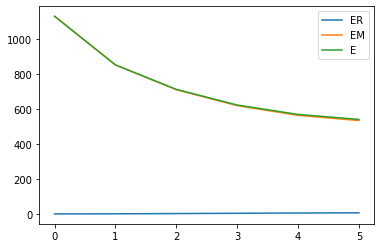

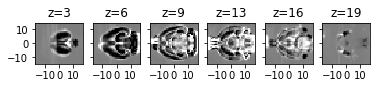

Completed iteration 5, E=541.5649087696047, EM=535.1514660995097, ER=6.413442670095018
Completed iteration 6, E=525.3930843682315, EM=518.1006712977777, ER=7.292413070453839
Completed iteration 7, E=513.4715765408798, EM=505.4134875125699, ER=8.058089028309904
Completed iteration 8, E=503.9832703125656, EM=495.25298438510646, ER=8.730285927459155
Completed iteration 9, E=496.38944350250074, EM=487.0234466055212, ER=9.365996896979528


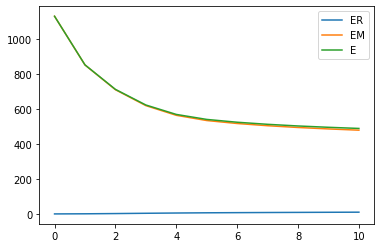

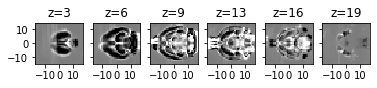

Completed iteration 10, E=489.8380403896026, EM=479.8728271859901, ER=9.96521320361252
Completed iteration 11, E=484.1987669017523, EM=473.66231624933516, ER=10.536450652417184
Completed iteration 12, E=479.06861390242506, EM=467.99082338456833, ER=11.077790517856721
Completed iteration 13, E=474.26866639603696, EM=462.6630644899677, ER=11.605601906069259
Completed iteration 14, E=469.87813306916496, EM=457.76775679652593, ER=12.11037627263901


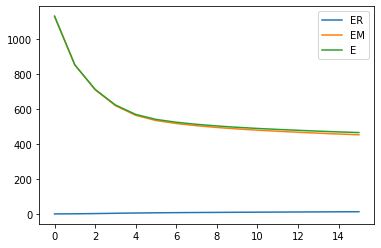

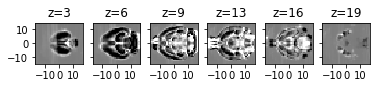

Completed iteration 15, E=466.16864770889003, EM=453.5686686096835, ER=12.599979099206497
Completed iteration 16, E=462.7739857347524, EM=449.69609549718064, ER=13.077890237571753
Completed iteration 17, E=459.68480318913913, EM=446.1323479700907, ER=13.552455219048456
Completed iteration 18, E=456.8893735679769, EM=442.86365488481124, ER=14.02571868316568
Completed iteration 19, E=454.39236989781693, EM=439.89095913914775, ER=14.501410758669195


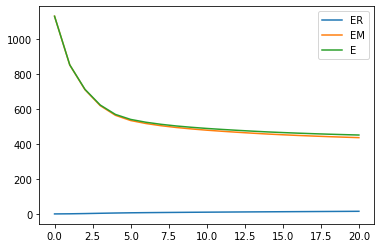

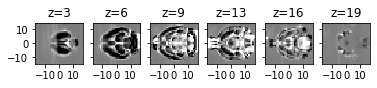

Completed iteration 20, E=452.0810038335161, EM=437.10387658216655, ER=14.977127251349547
Completed iteration 21, E=449.9620883805463, EM=434.5129546276431, ER=15.449133752903148
Completed iteration 22, E=447.95616959284746, EM=432.03807786600004, ER=15.918091726847436
Completed iteration 23, E=446.05662960393505, EM=429.6722008911448, ER=16.384428712790246
Completed iteration 24, E=444.26449816408007, EM=427.4152320395233, ER=16.849266124556788


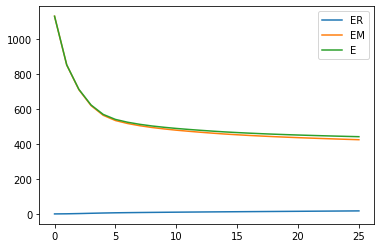

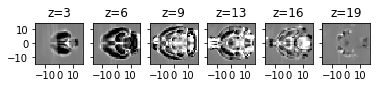

Completed iteration 25, E=442.56854946126435, EM=425.25402743712857, ER=17.314522024135766
Completed iteration 26, E=441.0056230504497, EM=423.2243823647429, ER=17.781240685706813
Completed iteration 27, E=439.56849789911905, EM=421.31832903687837, ER=18.250168862240667
Completed iteration 28, E=438.22694832136403, EM=419.5060843083812, ER=18.72086401298279
Completed iteration 29, E=437.00235604361336, EM=417.80816028270266, ER=19.194195760910713


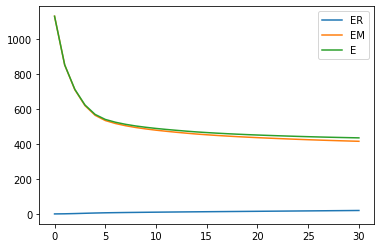

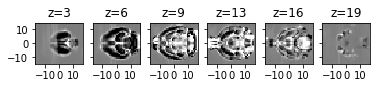

Completed iteration 30, E=435.85141681590324, EM=416.1815714646599, ER=19.669845351243342
Completed iteration 31, E=434.76958585191943, EM=414.62329882031884, ER=20.14628703160058
Completed iteration 32, E=433.83037469791066, EM=413.2061784764226, ER=20.624196221488024
Completed iteration 33, E=433.0260950666729, EM=411.9218716916812, ER=21.104223374991708
Completed iteration 34, E=432.28298821547503, EM=410.6961901268294, ER=21.586798088645626


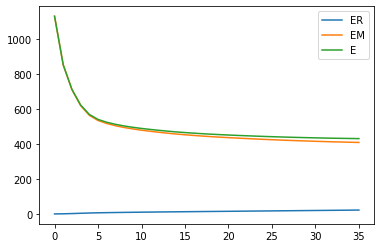

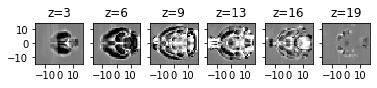

Completed iteration 35, E=431.57483017583075, EM=409.50472259949106, ER=22.070107576339698
Completed iteration 36, E=430.9095383302914, EM=408.35637960577117, ER=22.553158724520216
Completed iteration 37, E=430.3173559867299, EM=407.2823823525665, ER=23.034973634163414
Completed iteration 38, E=429.7353963512647, EM=406.2206188308108, ER=23.514777520453872
Completed iteration 39, E=429.21963094128404, EM=405.2302758713626, ER=23.989355069921405


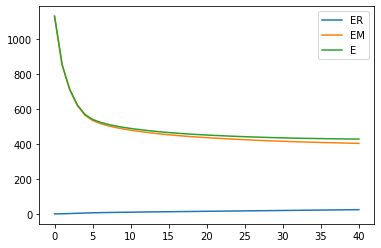

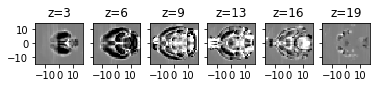

Completed iteration 40, E=428.747529708593, EM=404.287046456692, ER=24.46048325190102
Completed iteration 41, E=428.30580862547555, EM=403.3786461251207, ER=24.927162500354836
Completed iteration 42, E=427.8994565373139, EM=402.5098680178542, ER=25.389588519459654
Completed iteration 43, E=427.50846253145795, EM=401.66003825115314, ER=25.848424280304794
Completed iteration 44, E=427.16308315144033, EM=400.85926743963205, ER=26.303815711808262


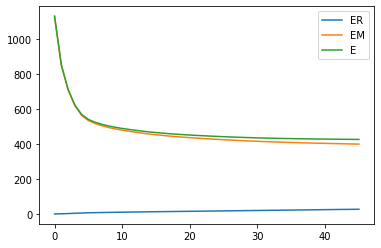

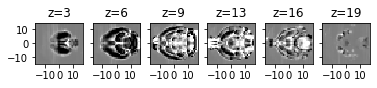

Completed iteration 45, E=426.8287385135645, EM=400.07299963021904, ER=26.75573888334543
Completed iteration 46, E=426.56626792195357, EM=399.36460087937024, ER=27.201667042583345
Completed iteration 47, E=426.341327920911, EM=398.698671736914, ER=27.642656183997033
Completed iteration 48, E=426.14518707872037, EM=398.0666150885838, ER=28.078571990136584
Completed iteration 49, E=425.9764391487875, EM=397.4670658198271, ER=28.50937332896039


In [4]:
#%% Perform registration.
transform = ardent.Transform()
transform.register(template=atlas, target=target, 
                   sigmaM=3.0,sigmaR=1e2,                    
                   order=4, # add a cubic polynomial transform
                   eV=5e1, eT=1e-5, eL=1e-8,                    
                   niter=50, draw=True)

In [5]:
#%% Apply the transformation.
resampled_atlas = transform.apply_transform(subject=atlas, deform_to='target-identity', save_path=None)
deformed_atlas = transform.apply_transform(subject=atlas, deform_to='target', save_path=None)
deformed_target = transform.apply_transform(subject=target, deform_to='template', save_path=None)

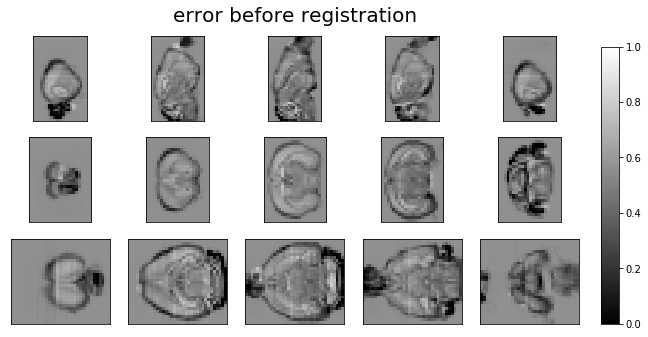

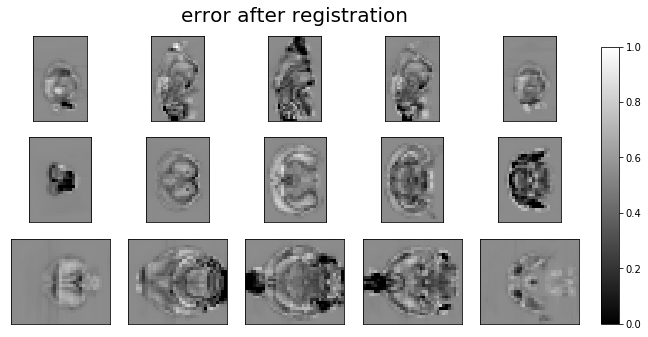

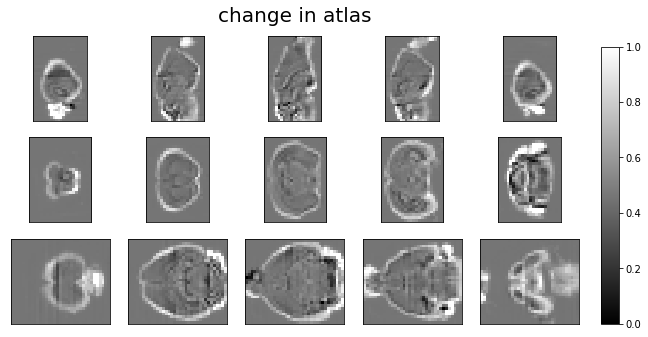

In [6]:
#%% Visualize results.
# To simply visualize error we plot the difference between images.
ardent.heatslices(target - resampled_atlas, title='error before registration', limit_mode='stdev')
ardent.heatslices(target - deformed_atlas, title='error after registration', limit_mode='stdev')
ardent.heatslices(resampled_atlas - deformed_atlas, title='change in atlas', limit_mode='stdev')